<a href="https://colab.research.google.com/github/lollolzz/Colab/blob/main/Ch4.%20%EB%94%A5%EB%9F%AC%EB%8B%9D/1_%ED%85%8D%EC%8A%A4%ED%8A%B8_%EC%A0%84%EC%B2%98%EB%A6%AC_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
날짜 : 2021/11/23
이름 : 권능한
내용 : 텍스트 분석 전처리 실습하기

"""

!pip install konlpy

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from konlpy.tag import Okt,Kkma
from wordcloud import WordCloud
import seaborn as sns

In [ ]:
###############################################################
# 형태소 분석

In [ ]:
# 꼬꼬마 형태소 분석기 생성
kkma = Kkma()

text = '나는 보리밥을 먹었다.'
print('명사 : ', kkma.nouns(text))
print('형태소 : ', kkma.morphs(text))
print('품사 :', kkma.pos(text))

명사 :  ['나', '보리밥']
형태소 :  ['나', '는', '보리밥', '을', '먹', '었', '다', '.']
품사 : [('나', 'NP'), ('는', 'JX'), ('보리밥', 'NNG'), ('을', 'JKO'), ('먹', 'VV'), ('었', 'EPT'), ('다', 'EFN'), ('.', 'SF')]


In [ ]:
#OKT(open Korean Text) 텍스트 분석기 생성
okt = Okt()

text = '나는 보리밥을 먹었다'
print('명사 : ', okt.nouns(text))
print('형태소 : ', okt.morphs(text))
print('품사 :', okt.pos(text))

명사 :  ['나', '보리밥']
형태소 :  ['나', '는', '보리밥', '을', '먹었다']
품사 : [('나', 'Noun'), ('는', 'Josa'), ('보리밥', 'Noun'), ('을', 'Josa'), ('먹었다', 'Verb')]


In [ ]:
###################################################
# 토큰화(Bow)

text = ['You are so beautiful',
        'You are the best',
        'I love dog',
        'i drink coffee every morning',
        'I hate you']

tokenizer = Tokenizer()
tokenizer.fit_on_texts(text)
word_dic = tokenizer.word_index
word_dic

{'are': 3,
 'beautiful': 5,
 'best': 7,
 'coffee': 11,
 'dog': 9,
 'drink': 10,
 'every': 12,
 'hate': 14,
 'i': 2,
 'love': 8,
 'morning': 13,
 'so': 4,
 'the': 6,
 'you': 1}

In [ ]:
# 텍스트 벡터화
sequences = tokenizer.texts_to_sequences(text)
sequences

[[1, 3, 4, 5], [1, 3, 6, 7], [2, 8, 9], [2, 10, 11, 12, 13], [2, 14, 1]]

In [ ]:
# 패딩처리
padd_sequences = pad_sequences(sequences, padding='post')
padd_sequences

array([[ 1,  3,  4,  5,  0],
       [ 1,  3,  6,  7,  0],
       [ 2,  8,  9,  0,  0],
       [ 2, 10, 11, 12, 13],
       [ 2, 14,  1,  0,  0]], dtype=int32)

In [ ]:
######################################################
# 텍스트 탐색분석
train_data = pd.read_table('/content/drive/MyDrive/Colab Notebooks/file/movie_review_test.txt')
test_data = pd.read_table('/content/drive/MyDrive/Colab Notebooks/file/movie_review_train.txt')
train_data

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
...,...,...,...
49995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
49997,9072549,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0
49998,5802125,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0


In [ ]:
# 리뷰 길이 확인
review_length = train_data['document'].astype(str).apply(len)
review_length

0         3
1        20
2        38
3        32
4        49
         ..
49995    41
49996    44
49997    34
49998    46
49999    10
Name: document, Length: 50000, dtype: int64

Text(0, 0.5, 'Count')

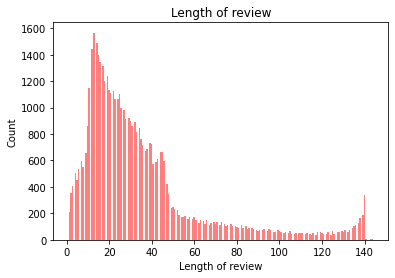

In [ ]:
plt.hist(review_length, bins=200, alpha=0.5, color='r', label='word')
plt.title('Length of review')
plt.xlabel('Length of review')
plt.ylabel('Count')

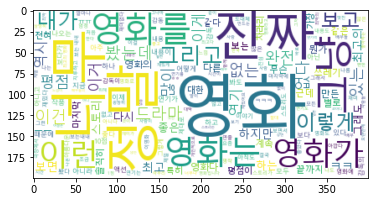

In [ ]:
# 어휘 빈도 확인
train_review = [review for review in train_data['document'] if type(review) is str]
train_review

wc = WordCloud(
    font_path = '/content/drive/MyDrive/Colab Notebooks/file/malgun.ttf',
    background_color = 'white'
).generate(''.join(train_review))
plt.imshow(wc, interpolation='bilinear')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


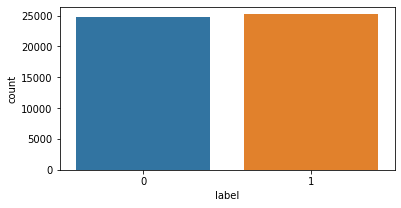

In [ ]:
# 긍정, 부정 비율 확인 
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(train_data['label'])